In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd 

from scipy.stats import skewnorm
import matplotlib.pyplot as plt 
import seaborn as sns 

from pathlib import Path

from utils.hellinger import hellinger_distance
from utils.gdv import generalized_discrimination_value

In [8]:
sns.set_theme(context='notebook', style='white', font='Arial', font_scale=1.5)

In [9]:
palette = ['#EB9486', '#7E7F9A']

# Demonstration of aGDV and HDV with artifical data

Here we provide some scenarios with different class seperability to demonstrate some characteristics of the aGDV and the HDV.

### 1D uni-modal normal distributions with moderate overlap

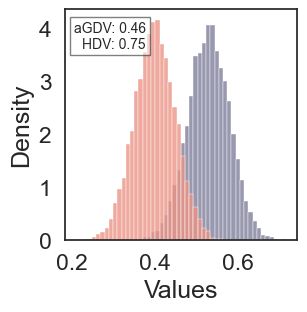

In [11]:
N = 10000
A = 0 
scale = 0.05
loc = 0.5 

u = skewnorm.rvs(0, scale=scale, loc=0.40, size=N)
v = skewnorm.rvs(0, scale=scale, loc=0.53, size=N)

u = u[:, None]
v = v[:, None]

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])

gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)

data = pd.DataFrame({0: u[:, 0], 1: v[:, 0]})
fig, ax = plt.subplots(figsize=(3,3))

sns.histplot(data, stat='density', palette=palette, alpha=0.8, ax=ax, legend=False, bins=50)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)


plt.xlabel('Values')
plt.show()

#### 1D uni-modal skweded distribution with small overlap

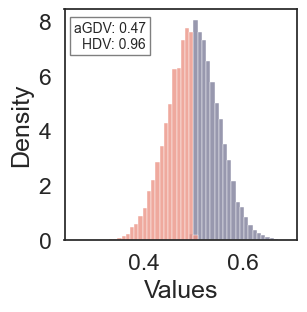

In [12]:
N = 10000
A = 0 
scale = 0.05
loc = 0.5 

# uni modal easy case 
u = skewnorm.rvs(-100, scale=scale, loc=0.5, size=N)
v = skewnorm.rvs(100, scale=scale, loc=0.5, size=N)

u = u[:, None]
v = v[:, None]

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])

gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)

data = pd.DataFrame({0: u[:, 0], 1: v[:, 0]})
fig, ax = plt.subplots(figsize=(3,3))

sns.histplot(data, stat='density', palette=palette, alpha=0.8, ax=ax, legend=False, bins=50)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)


plt.xlabel('Values')
plt.show()

### 1D multi-modal with little overlap 

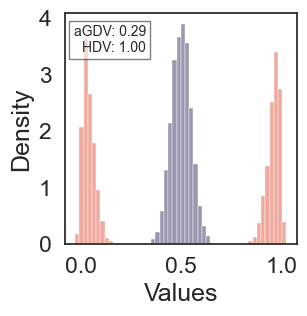

In [13]:
N = 10000
A = 0 
scale = 0.05

# bi modal easy case 
u1 = skewnorm.rvs(5, scale=scale, loc=0, size=N//2)
u2 = skewnorm.rvs(-5, scale=scale, loc=1, size=N//2)
u = np.concatenate([u1, u2])

v = skewnorm.rvs(A, scale=scale, loc=0.5, size=N)

u = u[:, None]
v = v[:, None]

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])

gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)


data = pd.DataFrame({0: u[:, 0], 1: v[:, 0]})
fig, ax = plt.subplots(figsize=(3,3))

sns.histplot(data, stat='density', palette=palette, alpha=0.8, ax=ax, legend=False, bins=50)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)


plt.xlabel('Values')
plt.show()

### 1D multi-modal with large overlap

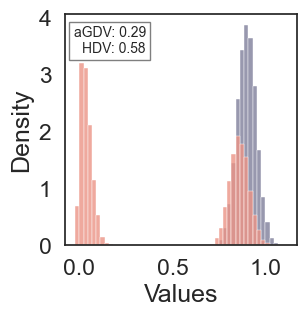

In [14]:
N = 10000
A = 0 
scale = 0.05

u1 = skewnorm.rvs(5, scale=scale, loc=0, size=N//2)
u2 = skewnorm.rvs(A, scale=scale, loc=0.86, size=N//2)
u = np.concatenate([u1, u2])

v = skewnorm.rvs(A, scale=scale, loc=0.9, size=N)

u = u[:, None]
v = v[:, None]

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])

gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)

data = pd.DataFrame({0: u[:, 0], 1: v[:, 0]})
fig, ax = plt.subplots(figsize=(3,3))

sns.histplot(data, stat='density', palette=palette, alpha=0.8, ax=ax, legend=False, bins=50)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)


plt.xlabel('Values')
plt.show()

### 2D uni-modal normal distributions with strong overlap 

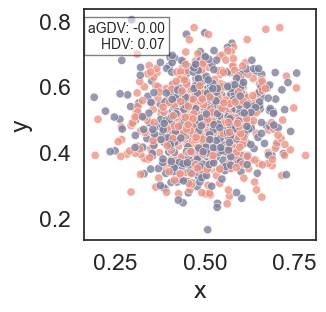

In [15]:
N = 500
A = 0 
scale = 0.1

u_x = skewnorm.rvs(0, scale=scale, loc=0.5, size=N)
u_y = skewnorm.rvs(0, scale=scale, loc=0.5, size=N)

u = np.stack([u_x, u_y], axis=1)

v_x = skewnorm.rvs(0, scale=scale, loc=0.5, size=N)
v_y = skewnorm.rvs(0, scale=scale, loc=0.5, size=N)

v = np.stack([v_x, v_y], axis=1)

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])

gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)

data = pd.DataFrame({'x': f[:, 0], 'y': f[:, 1], 'label': l})
data = data.sample(len(data))
fig, ax = plt.subplots(figsize=(3,3))

sns.scatterplot(data, x='x', y='y', hue='label', palette=palette, alpha=0.8, ax=ax, legend=False)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)

plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 2D uni-modal normal distributions with little overlap

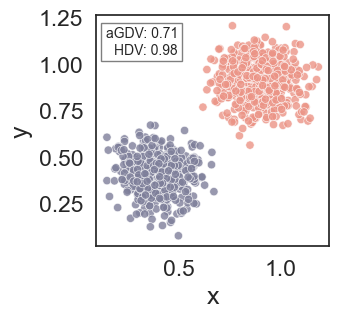

In [17]:
N = 500
A = 0 
scale = 0.1

u_x = skewnorm.rvs(0, scale=scale, loc=0.9, size=N)
u_y = skewnorm.rvs(0, scale=scale, loc=0.9, size=N)

u = np.stack([u_x, u_y], axis=1)

v_x = skewnorm.rvs(0, scale=scale, loc=0.4, size=N)
v_y = skewnorm.rvs(0, scale=scale, loc=0.4, size=N)

v = np.stack([v_x, v_y], axis=1)

u_l = np.zeros(N)
v_l = np.ones(N)

f = np.concatenate([u, v])
l = np.concatenate([u_l, v_l])


gdv = generalized_discrimination_value(features=f, targets=l)
hdv = hellinger_distance(features=f, targets=l, distance=True)


data = pd.DataFrame({'x': f[:, 0], 'y': f[:, 1], 'label': l})
data = data.sample(len(data))
fig, ax = plt.subplots(figsize=(3,3))

sns.scatterplot(data, x='x', y='y', hue='label', palette=palette, alpha=0.8, ax=ax, legend=False)

# Set the text content
text1 = f"aGDV: {-1 * gdv:.2f}"
text2 = f"HDV: {hdv:.2f}"

# Set the position of the box and the text inside it
box_props = dict(boxstyle='square', facecolor='white', alpha=0.5, edgecolor='black')
ax.text(0.35, 0.95, f"{text1}\n{text2}", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=box_props)

plt.xlabel('x')
plt.ylabel('y')
plt.show()
